<a href="https://colab.research.google.com/github/vaibhavupreti24/EDA-ICC-CWC2023/blob/main/practicebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Virat Kohli Century Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('deliveries.csv')

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
26114,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.1,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26115,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.2,Netherlands,India,PA van Meekeren,AT Nidamanuru,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26116,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.3,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26117,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.4,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26118,45,2023/24,2023-11-12,"M Chinnaswamy Stadium, Bengaluru",2,47.5,Netherlands,India,AT Nidamanuru,PA van Meekeren,...,0,NaN,NaN,NaN,NaN,NaN,caught,AT Nidamanuru,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                26119 non-null  int64  
 1   season                  26119 non-null  object 
 2   start_date              26119 non-null  object 
 3   venue                   26119 non-null  object 
 4   innings                 26119 non-null  int64  
 5   ball                    26119 non-null  float64
 6   batting_team            26119 non-null  object 
 7   bowling_team            26119 non-null  object 
 8   striker                 26119 non-null  object 
 9   non_striker             26119 non-null  object 
 10  bowler                  26119 non-null  object 
 11  runs_off_bat            26119 non-null  int64  
 12  extras                  26119 non-null  int64  
 13  wides                   665 non-null    float64
 14  noballs                 56 non-null   

In [ ]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
df.shape

(26119, 22)

In [ ]:
df.isna().sum()

,0
match_id,0
season,0
start_date,0
venue,0
innings,0
ball,0
batting_team,0
bowling_team,0
striker,0
non_striker,0


In [ ]:
extra_cols = ['wides', 'noballs', 'byes', 'legbyes', 'penalty']
df[extra_cols] = df[extra_cols].fillna(0)

In [ ]:
df['wicket_type'] = df['wicket_type'].fillna('Not out')
df['player_dismissed'] = df['player_dismissed'].fillna('None')

In [ ]:
df['other_wicket_type'] = df['other_wicket_type'].fillna('None')
df['other_player_dismissed'] = df['other_player_dismissed'].fillna('None')

In [ ]:
df.isna().sum()

,0
match_id,0
season,0
start_date,0
venue,0
innings,0
ball,0
batting_team,0
bowling_team,0
striker,0
non_striker,0


In [ ]:
tournament_fours = df[df['runs_off_bat'] == 4]['runs_off_bat'].count()
tournament_sixes = df[df['runs_off_bat'] == 6]['runs_off_bat'].count()

In [ ]:
tournament_fours

np.int64(2241)

In [ ]:
tournament_sixes

np.int64(644)

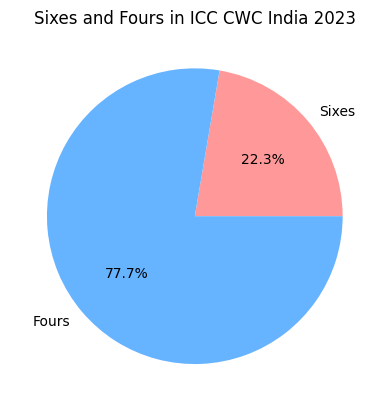

In [ ]:
colors = ['#ff9999', '#66b3ff']
plt.pie([tournament_sixes, tournament_fours], labels = ['Sixes', 'Fours'], autopct = '%1.1f%%', colors = colors)
plt.title('Sixes and Fours in ICC CWC India 2023')
plt.show()

In [ ]:
teams = sorted(df['batting_team'].unique())

print("Teams that played in ICC CWC 2023:")
for i, team in enumerate(teams, start=1):
    print(f"{i}: {team}")

Teams that played in ICC CWC 2023:
1: Afghanistan
2: Australia
3: Bangladesh
4: England
5: India
6: Netherlands
7: New Zealand
8: Pakistan
9: South Africa
10: Sri Lanka


In [ ]:
top_scorer = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
print(top_scorer)

striker
V Kohli              765
RG Sharma            597
Q de Kock            594
R Ravindra           578
DJ Mitchell          552
DA Warner            535
SS Iyer              530
KL Rahul             452
HE van der Dussen    448
MR Marsh             441
Name: runs_off_bat, dtype: int64


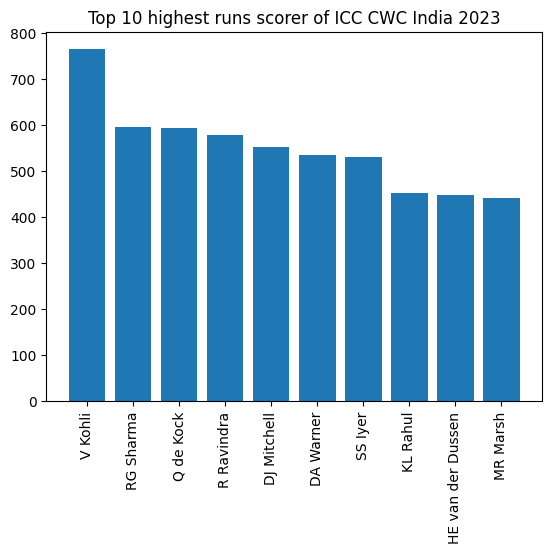

In [ ]:
plt.bar(df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).index,df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10).values)
plt.title('Top 10 highest runs scorer of ICC CWC India 2023')
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_sixhitter = df[df['runs_off_bat'] == 6].groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)
print(top_sixhitter)

striker
RG Sharma       31
SS Iyer         24
DA Warner       24
DJ Mitchell     22
GJ Maxwell      22
Q de Kock       21
MR Marsh        21
DA Miller       20
H Klaasen       19
Fakhar Zaman    18
Name: runs_off_bat, dtype: int64


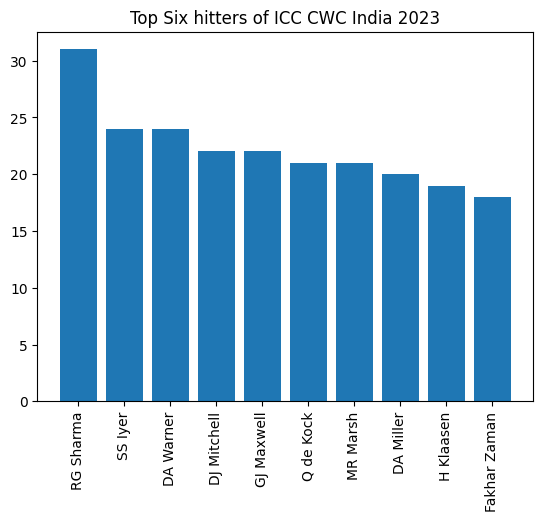

In [ ]:
plt.bar(top_sixhitter.index, top_sixhitter.values)
plt.title('Top Six hitters of ICC CWC India 2023')
plt.xticks(rotation=90)
plt.show()

In [ ]:
sixes_df = df[df['runs_off_bat'] == 6]
venue_counts = sixes_df['venue'].value_counts().head(10).reset_index()
venue_counts.columns = ['Venue', 'Sixes Hit']
venue_counts

,Venue,Sixes Hit
0,"Wankhede Stadium, Mumbai",106
1,"Arun Jaitley Stadium, Delhi",84
2,"M Chinnaswamy Stadium, Bengaluru",83
3,"Maharashtra Cricket Association Stadium, Pune",75
4,"Himachal Pradesh Cricket Association Stadium, ...",70
5,"MA Chidambaram Stadium, Chepauk, Chennai",60
6,"Narendra Modi Stadium, Ahmedabad",54
7,"Eden Gardens, Kolkata",50
8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",35
9,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,27


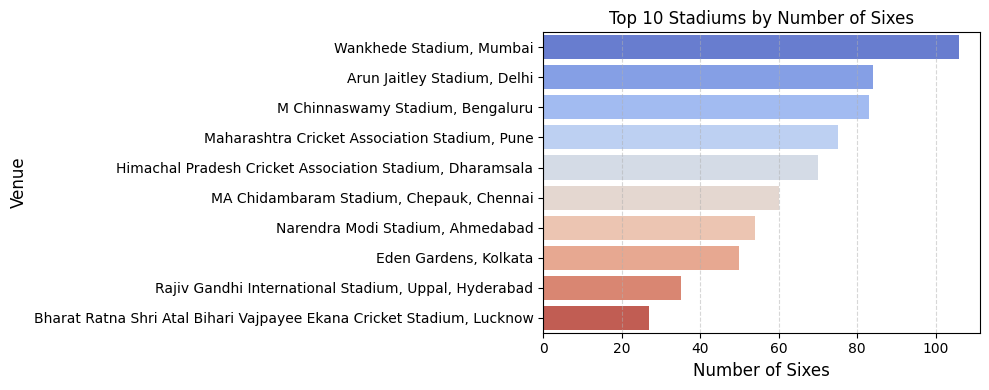

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data=venue_counts, x='Sixes Hit', y='Venue', palette='coolwarm')
plt.title('Top 10 Stadiums by Number of Sixes', fontsize=12)
plt.xlabel('Number of Sixes', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
fours_df = df[df['runs_off_bat'] == 4]
fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10)

,runs_off_bat
striker,
V Kohli,68
RG Sharma,66
Q de Kock,57
R Ravindra,55
DP Conway,54
DA Warner,50
DJ Malan,50
DJ Mitchell,48
P Nissanka,44


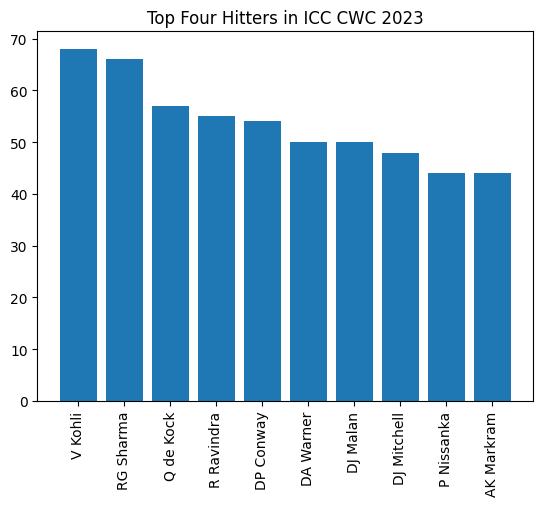

In [ ]:
plt.bar(fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).index, fours_df.groupby('striker')['runs_off_bat'].count().sort_values(ascending=False).head(10).values)
plt.title('Top Four Hitters in ICC CWC 2023')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
fours_df['venue'].value_counts().head(10)

,count
venue,
"Arun Jaitley Stadium, Delhi",289
"M Chinnaswamy Stadium, Bengaluru",260
"Wankhede Stadium, Mumbai",249
"Himachal Pradesh Cricket Association Stadium, Dharamsala",242
"Eden Gardens, Kolkata",220
"Maharashtra Cricket Association Stadium, Pune",219
"Narendra Modi Stadium, Ahmedabad",212
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",197
"MA Chidambaram Stadium, Chepauk, Chennai",189


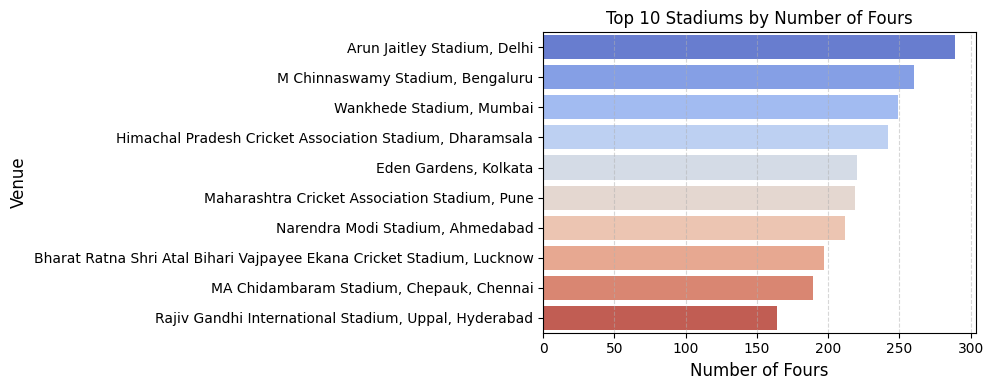

In [ ]:
fours_venue = fours_df['venue'].value_counts().head(10).reset_index()
fours_venue.columns = ['Venue', 'Fours Hit']
plt.figure(figsize=(10, 4))
sns.barplot(data=fours_venue, x='Fours Hit', y='Venue', palette='coolwarm')
plt.title('Top 10 Stadiums by Number of Fours', fontsize=12)
plt.xlabel('Number of Fours', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
result_maxruns = (df[df['innings'] == 1].groupby(['match_id','batting_team'])['runs_off_bat'].sum() + df[df['innings'] == 1].groupby(['match_id','batting_team'])['extras'].sum()).sort_values(ascending=False).head(10)
result_maxruns

,,0
match_id,batting_team,
4,South Africa,428
45,India,410
35,New Zealand,401
20,South Africa,399
24,Australia,399
46,India,397
27,Australia,388
23,South Africa,382
18,Australia,367


In [ ]:
result_maxruns = df.groupby(['match_id','striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(10)
result_maxruns

,,runs_off_bat
match_id,striker,
39,GJ Maxwell,201
43,MR Marsh,177
23,Q de Kock,174
18,DA Warner,163
1,DP Conway,152
7,DJ Malan,140
48,TM Head,137
46,DJ Mitchell,134
32,HE van der Dussen,133


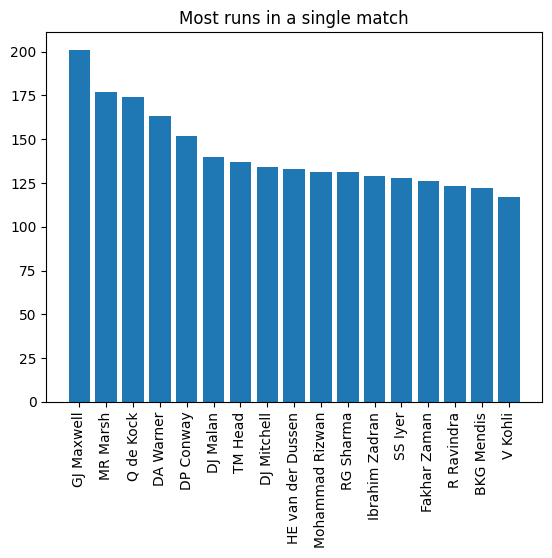

In [ ]:
result_maxruns = df.groupby(['match_id','striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(20)
# Reset the index to access columns by name:
result_maxruns = result_maxruns.reset_index()
plt.bar(result_maxruns['striker'], result_maxruns['runs_off_bat'])
plt.title('Most runs in a single match')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
(df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False)

,0
batting_team,
India,3160
Australia,3087
South Africa,2897
New Zealand,2864
Pakistan,2328
England,2245
Afghanistan,2095
Bangladesh,2053
Sri Lanka,2048


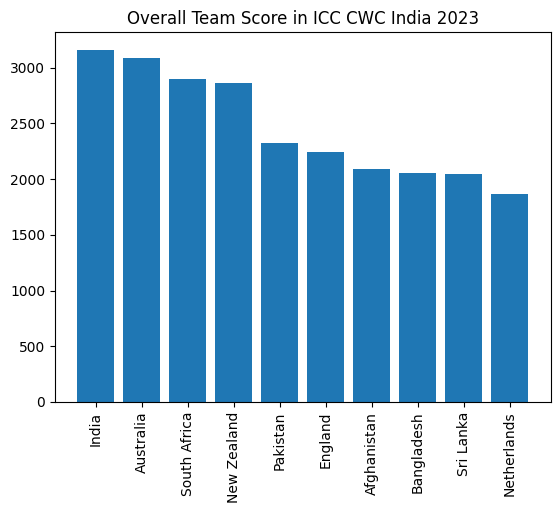

In [ ]:
plt.bar((df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).index, (df.groupby('batting_team')['runs_off_bat'].sum() + df.groupby('batting_team')['extras'].sum()).sort_values(ascending = False).values)
plt.title('Overall Team Score in ICC CWC India 2023')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def OverallBatsmanStats(player_name):
    if player_name not in df['striker'].unique():
        return 'Invalid Player Name, please check the spelling or try another name.'

    batsman_df = df[df['striker'] == player_name]
    match_runs = batsman_df.groupby('match_id')['runs_off_bat'].sum()

    total_runs = match_runs.sum()
    matches = match_runs.count()
    highest_score = match_runs.max()
    fifties = sum(50 <= runs < 100 for runs in match_runs)
    hundreds = sum(runs >= 100 for runs in match_runs)
    balls_faced = batsman_df['runs_off_bat'].count()

    # Dismissals: count how many times this batsman was dismissed in the 'player_dismissed' column
    dismissals = df[df['player_dismissed'] == player_name]['match_id'].count()
    not_outs = matches - dismissals

    strike_rate = round((total_runs / balls_faced) * 100, 2) if balls_faced else 0
    average = round(total_runs / dismissals, 2) if dismissals else total_runs

    # -- Stats Table --
    stats = pd.DataFrame({
        'PlayerName': [player_name],
        'Matches': [matches],
        'Total Runs': [total_runs],
        'Highest Score': [highest_score],
        '50s': [fifties],
        '100s': [hundreds],
        'Balls Faced': [balls_faced],
        'Dismissals': [dismissals],
        'Average': [average],
        'Strike Rate': [strike_rate]
    })

    display(stats)

    # --- Chart 1: Runs & Highest Score ---
    plt.figure(figsize=(6, 3))
    sns.barplot(x=['Total Runs', 'Highest Score'], y=[total_runs, highest_score], palette='Blues')
    plt.title(f'{player_name} - Run Overview', fontsize=10)
    plt.ylabel('Runs')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Chart 2: 50s & 100s ---
    plt.figure(figsize=(5, 3))
    sns.barplot(x=['50s', '100s'], y=[fifties, hundreds], palette='Oranges')
    plt.title(f'{player_name} - Milestones (50s & 100s)', fontsize=10)
    plt.ylabel('Count')
    plt.ylim(0, max(fifties, hundreds) + 1)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Chart 3: Pie Chart ---
    plt.figure(figsize=(4, 4))
    if dismissals >= 0 and not_outs >= 0 and (dismissals + not_outs) > 0:
        plt.pie([dismissals, not_outs],
                labels=['Dismissals', 'Not Outs'],
                autopct='%1.1f%%',
                startangle=140,
                colors=['#ff9999', '#66b3ff'],
                textprops={'fontsize': 8})
        plt.title(f'{player_name} - Dismissals vs Not Outs', fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cannot create pie chart due to invalid values.")
        print(f"Dismissals: {dismissals}, Not Outs: {not_outs}")

    # --- Chart 4: Match-by-Match Run Trend ---
    plt.figure(figsize=(8, 3))
    match_trend = match_runs.reset_index(drop=True)
    sns.lineplot(x=match_trend.index + 1, y=match_trend.values, marker='o', color='green')
    plt.title(f'{player_name} - Runs in Each Match', fontsize=10)
    plt.xlabel('Match Number')
    plt.ylabel('Runs')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Chart 5: Radar Chart for Performance Metrics ---
    from math import pi
    radar_data = {
        'Metric': ['Strike Rate', 'Average', '50s', '100s'],
        'Value': [strike_rate, average, fifties, hundreds]
    }
    radar_df = pd.DataFrame(radar_data)

    categories = radar_df['Metric']
    values = radar_df['Value'].values.tolist()
    values += values[:1]  # Close the radar chart

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(4, 4))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, fontsize=8)
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='purple')
    ax.fill(angles, values, 'purple', alpha=0.25)
    plt.title(f'{player_name} - Performance Radar', y=1.1, fontsize=10)
    plt.tight_layout()
    plt.show()

,PlayerName,Matches,Total Runs,Highest Score,50s,100s,Balls Faced,Dismissals,Average,Strike Rate
0,V Kohli,11,765,117,6,3,866,8,95.62,88.34


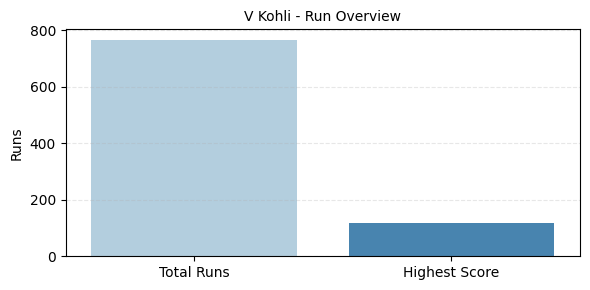

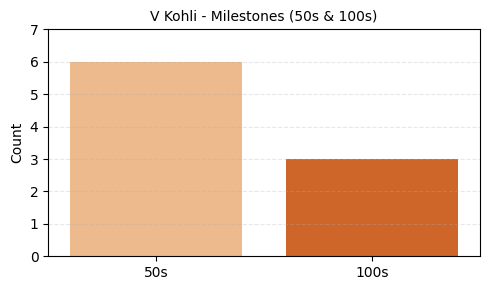

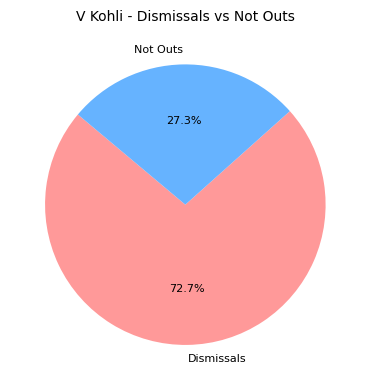

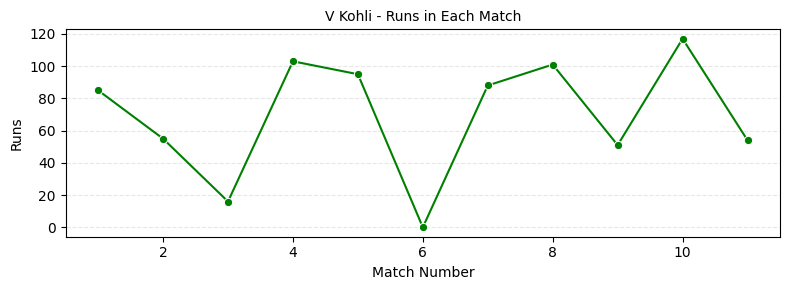

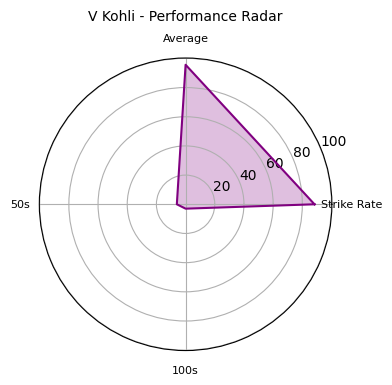

In [ ]:
OverallBatsmanStats('V Kohli') # Any player of your choice

In [ ]:
extra_cols = ['wides', 'noballs', 'byes', 'legbyes', 'penalty']
df[extra_cols] = df[extra_cols].fillna(0)
df['wicket_type'] = df['wicket_type'].fillna('Not out')
df['player_dismissed'] = df['player_dismissed'].fillna('None')
df['other_wicket_type'] = df['other_wicket_type'].fillna('None')
df['other_player_dismissed'] = df['other_player_dismissed'].fillna('None')
df['total_runs'] = df['runs_off_bat'] + df['extras']

In [ ]:
top_wicket_takers = df[df['player_dismissed'] != 'None'].groupby('bowler').size().reset_index(name='wickets')
top_wicket_takers = top_wicket_takers.sort_values('wickets', ascending=False).head(10)
fig = px.bar(top_wicket_takers, x='bowler', y='wickets', title='Top 10 Wicket-Takers ICC CWC 2023 India')
fig.show()

In [ ]:
# Calculate legal deliveries per bowler (excluding wides and no-balls)
df['legal_delivery'] = ((df['wides'] == 0) & (df['noballs'] == 0)).astype(int)

# Total runs and balls bowled
bowler_runs = df.groupby('bowler')['total_runs'].sum()
bowler_balls = df.groupby('bowler')['legal_delivery'].sum()

# Compute overs and economy rate
bowling_stats = pd.DataFrame({
    'runs': bowler_runs,
    'balls': bowler_balls,
})
bowling_stats['overs'] = bowling_stats['balls'] / 6
bowling_stats['economy'] = bowling_stats['runs'] / bowling_stats['overs']
bowling_stats = bowling_stats[bowling_stats['overs'] >= 50]
bowling_stats = bowling_stats.sort_values('economy').head(10).reset_index()

px.bar(bowling_stats, x='bowler', y='economy', title='Top 10 Most Economical Bowlers (Min 50 Overs)').show()


In [ ]:
# Step 1: Filter out dismissed players to count wickets
wickets = df[df['player_dismissed'] != 'None'].groupby(['match_id', 'bowler']).size().reset_index(name='wickets')

# Step 2: Total runs conceded by each bowler in each match
runs = df.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()

# Step 3: Merge wickets and runs data
figures = pd.merge(wickets, runs, on=['match_id', 'bowler'])

# Step 4: Sort by most wickets, then by least runs
best_figures = figures.sort_values(['wickets', 'total_runs'], ascending=[False, True]).reset_index(drop=True)

# Step 5: Top 10 Bowling Spells
top10_figures = best_figures.head(10)

# Step 6: Create a label like "7/57 vs Team"
# First, get opponent team per match and bowler
opponent_map = df.groupby(['match_id', 'bowler'])['batting_team'].first().reset_index()
top10_figures = pd.merge(top10_figures, opponent_map, on=['match_id', 'bowler'])

# Create labels
top10_figures['Spell'] = top10_figures['wickets'].astype(str) + '/' + top10_figures['total_runs'].astype(str)
top10_figures['label'] = top10_figures['bowler'] + ' - ' + top10_figures['Spell'] + ' vs ' + top10_figures['batting_team']

# Step 7: Plot using Plotly
fig = px.bar(
    top10_figures,
    x='label',
    y='wickets',
    color='total_runs',
    color_continuous_scale='Reds',
    title='🔥 Top 10 Bowling Performances – ICC World Cup 2023',
    labels={'label': 'Bowler & Match', 'wickets': 'Wickets Taken', 'total_runs': 'Runs Conceded'},
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
# Runs conceded and wickets taken by bowling team
team_runs = df.groupby('bowling_team')['total_runs'].sum().reset_index()
team_wickets = df[df['player_dismissed'] != 'None'].groupby('bowling_team').size().reset_index(name='wickets')

# Merge and calculate bowling average
team_stats = pd.merge(team_runs, team_wickets, on='bowling_team')
team_stats['bowling_avg'] = team_stats['total_runs'] / team_stats['wickets']
team_stats = team_stats.sort_values('bowling_avg')

px.bar(team_stats, x='bowling_team', y='bowling_avg', title='Team-wise Bowling Average').show()

In [ ]:
wicket_types = df[df['wicket_type'] != 'Not out']['wicket_type'].value_counts().reset_index()
wicket_types.columns = ['Wicket Type', 'Count']
px.pie(wicket_types, names='Wicket Type', values='Count', title='Distribution of Wicket Types').show()

In [ ]:
from math import pi

def OverallBowlerStats(player_name):
    if player_name not in df['bowler'].unique():
        return 'Invalid Player Name, please check the spelling or try another name.'

    bowler_df = df[df['bowler'] == player_name]


    wickets = bowler_df[bowler_df['player_dismissed'].notna() & (bowler_df['player_dismissed'] != 'None')].shape[0]


    runs_conceded = (bowler_df['runs_off_bat'] + bowler_df['extras']).sum()


    legal_df = bowler_df[(bowler_df['wides'] == 0) & (bowler_df['noballs'] == 0)]
    total_legal_balls = legal_df.shape[0]


    overs = total_legal_balls // 6 + (total_legal_balls % 6) / 10


    economy = round(runs_conceded / (total_legal_balls / 6), 2) if total_legal_balls else 0


    matches = bowler_df['match_id'].nunique()


    average = round(runs_conceded / wickets, 2) if wickets > 0 else 0


    strike_rate = round(total_legal_balls / wickets, 2) if wickets > 0 else 0

    stats = pd.DataFrame({
        'Player Name': [player_name],
        'Matches': [matches],
        'Overs Bowled': [round(overs, 1)],
        'Runs Conceded': [runs_conceded],
        'Wickets': [wickets],
        'Average': [average],
        'Strike Rate': [strike_rate],
        'Economy': [economy]
    })

    display(stats)

    # --- Chart 1: Wickets & Runs Conceded ---
    plt.figure(figsize=(6, 3))
    sns.barplot(x=['Wickets', 'Runs Conceded'], y=[wickets, runs_conceded], palette='coolwarm')
    plt.title(f'{player_name} - Wickets vs Runs', fontsize=10)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Chart 2: Economy vs Strike Rate ---
    plt.figure(figsize=(5, 3))
    sns.barplot(x=['Economy', 'Strike Rate'], y=[economy, strike_rate], palette='viridis')
    plt.title(f'{player_name} - Economy & Strike Rate', fontsize=10)
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

    # --- Chart 3: Match-by-Match Wickets ---
    match_wickets = bowler_df[bowler_df['player_dismissed'].notna() & (bowler_df['player_dismissed'] != 'None')]\
                        .groupby('match_id').size().reset_index(name='Wickets')
    plt.figure(figsize=(8, 3))
    sns.lineplot(x=range(1, len(match_wickets) + 1), y=match_wickets['Wickets'], marker='o', color='darkorange')
    plt.title(f'{player_name} - Wickets per Match', fontsize=10)
    plt.xlabel('Match Number')
    plt.ylabel('Wickets')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Chart 4: Radar Chart ---
    radar_data = {
        'Metric': ['Average', 'Economy', 'Strike Rate', 'Wickets'],
        'Value': [average, economy, strike_rate, wickets]
    }
    radar_df = pd.DataFrame(radar_data)

    categories = radar_df['Metric']
    values = radar_df['Value'].values.tolist()
    values += values[:1]

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(4, 4))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, fontsize=8)
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', color='teal')
    ax.fill(angles, values, 'teal', alpha=0.25)
    plt.title(f'{player_name} - Performance Radar', y=1.1, fontsize=10)
    plt.tight_layout()
    plt.show()


,Player Name,Matches,Overs Bowled,Runs Conceded,Wickets,Average,Strike Rate,Economy
0,Mohammed Shami,7,48.5,265,25,10.6,11.72,5.43


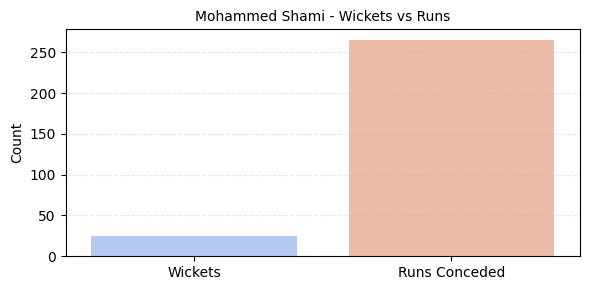

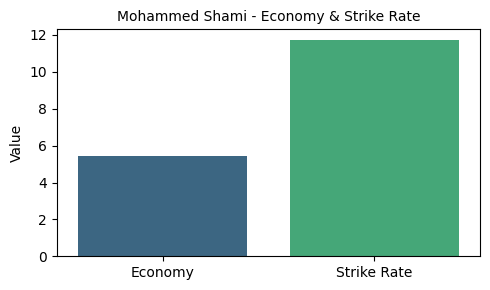

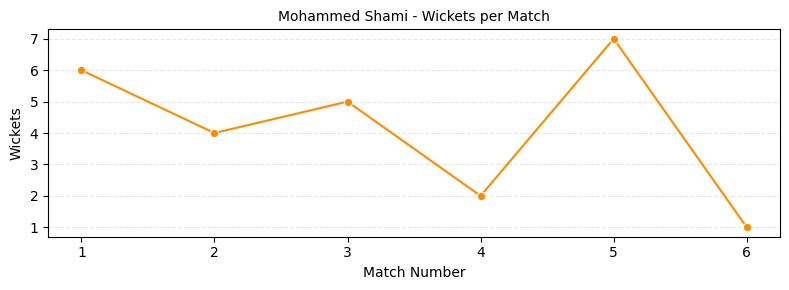

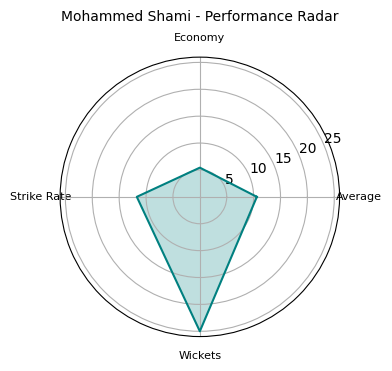

In [ ]:
OverallBowlerStats('Mohammed Shami') #Any player of your choice